<a href="https://colab.research.google.com/github/manishsinha44/Machine-Learning/blob/main/Kyphosis_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

In [3]:
kydf = pd.read_csv('kyphosis.csv')

In [4]:
kydf.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
kydf.tail()

,Kyphosis,Age,Number,Start
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


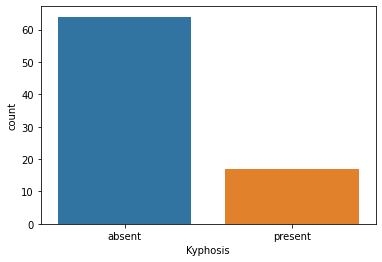

In [7]:
sns.countplot(x=kydf['Kyphosis'], label = 'Count')

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder_k = LabelEncoder()
kydf['Kyphosis']=labelencoder_k.fit_transform(kydf['Kyphosis'])

In [9]:
kydf

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [10]:
present = kydf[kydf['Kyphosis']==1]
absent = kydf[kydf['Kyphosis']==0]

In [12]:
print("Disease present after surgery = ",(len(present)/(len(present)+len(absent))*100), "%")

Disease present after surgery =  20.98765432098765 %


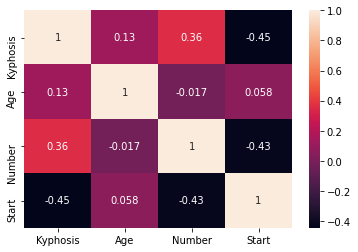

In [13]:
sns.heatmap(kydf.corr(),annot=True)

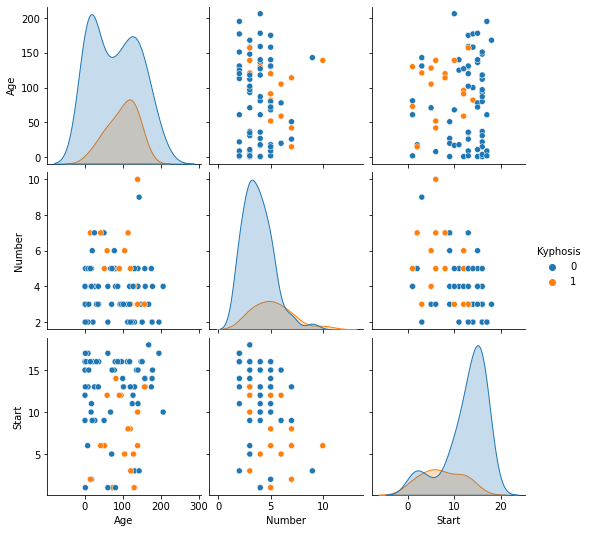

In [16]:
sns.pairplot( kydf,vars=['Age','Number','Start'],hue='Kyphosis')

In [17]:
X = kydf.drop('Kyphosis',axis=1)
y = kydf['Kyphosis']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [36]:
dec_tree = DecisionTreeClassifier()

In [37]:
dec_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [38]:
feature_importances = pd.DataFrame(dec_tree.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [39]:
feature_importances

,importance
Age,0.587190
Start,0.250491
Number,0.162319


In [40]:
y_train_predict = dec_tree.predict(X_train)

In [41]:
y_pred = dec_tree.predict(X_test)

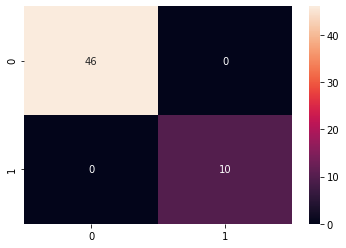

In [42]:
sns.heatmap(confusion_matrix(y_train,y_train_predict),annot=True)

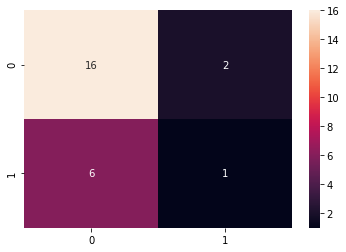

In [43]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [44]:
print (classification_report(y_train,y_train_predict))
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        10

    accuracy                           1.00        56
   macro avg       1.00      1.00      1.00        56
weighted avg       1.00      1.00      1.00        56

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        18
           1       0.33      0.14      0.20         7

    accuracy                           0.68        25
   macro avg       0.53      0.52      0.50        25
weighted avg       0.62      0.68      0.63        25



In [45]:
dec_tree2 = DecisionTreeClassifier()

In [46]:
dec_tree2.fit(X_train_scaled,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [48]:
y_pred2 = dec_tree2.predict(X_test_scaled)

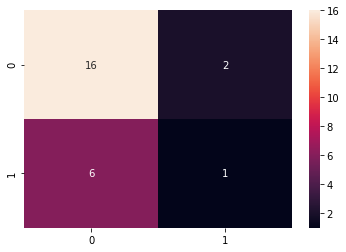

In [49]:
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True)

In [50]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        18
           1       0.33      0.14      0.20         7

    accuracy                           0.68        25
   macro avg       0.53      0.52      0.50        25
weighted avg       0.62      0.68      0.63        25



In [51]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
RandomForest2 = RandomForestClassifier(n_estimators=150)
RandomForest2.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

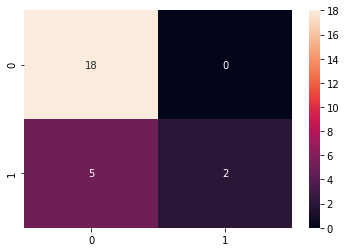

In [53]:
sns.heatmap(confusion_matrix(y_test,RandomForest.predict(X_test)),annot=True)

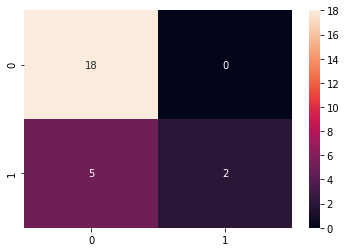

In [54]:
sns.heatmap(confusion_matrix(y_test,RandomForest2.predict(X_test_scaled)),annot=True)

In [55]:
print(classification_report(y_test,RandomForest2.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        18
           1       1.00      0.29      0.44         7

    accuracy                           0.80        25
   macro avg       0.89      0.64      0.66        25
weighted avg       0.84      0.80      0.76        25

